# U look like the Oscar winner! 

In [ ]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import urllib.request

from keras.models import Model, Sequential, model_from_json
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image

from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
"""
define a function for storing images locally
"""

def store_image(url, local_file_name):
    with urllib.request.urlopen(url) as resource:
        with open(local_file_name, 'wb') as f:
            f.write(resource.read())

In [ ]:
"""
Build the VGG Face model
"""

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
"""
‘Standing on the shoulder of giants’ - transfere pre-trained weights
"""
model.load_weights('/my_ds_projects/vgg_face_weights.h5')

In [ ]:
"""
Preprocess photo
"""
def preprocess_img(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

"""
FINDING SIMILARITIES between vectors

Cosine & Euclidean distances
"""
def CosSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def EuclDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [ ]:
"""
Representing images as 2622 dimensional vector
"""

vgg_face = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
"""
Set the threshold value for this face recognition model
"""

epsilon = 0.42

def verifyFace(img1, img2):
    img1_rep = vgg_face.predict(preprocess_img('/my_ds_projects/%s' % (img1)))[0,:]
    img2_rep = vgg_face.predict(preprocess_img('/my_ds_projects/%s' % (img2)))[0,:]
    
    cos_similarity = CosSimilarity(img1_rep, img2_rep)
    eucl_distance = EuclDistance(img1_rep, img2_rep)
    
    print("Cosine similarity: ",cos_similarity)
    print("Euclidean distance: ",eucl_distance)
    
    if cos_similarity < epsilon:
        print("-- They could be brothers/sisters! --")
    else:
        print("-- They look nothing alike! --")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('/my_ds_projects/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('/my_ds_projects/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("_" * 46)

In [ ]:
"""
Retrieving the images
"""

store_image('https://preview.redd.it/e8fbtiymc3j01.jpg?width=640&crop=smart&auto=webp&s=2a9c31c5976e4a89558c05e8eea499d00f418fbe',
            '/my_ds_projects/mr.jpg')
store_image('https://cdn10.bigcommerce.com/s-o6vy9cv/products/82296/images/82525/165592__64257.1519228517.1280.1280.jpg?c=2',
            '/my_ds_projects/tc.jpg')
store_image('https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F6%2F2020%2F08%2F25%2FGettyImages-1004078058.jpg',
            '/my_ds_projects/tc_2.jpg')
store_image('https://i2-prod.mirror.co.uk/incoming/article19370479.ece/ALTERNATES/s615b/0_FILM-WILD-ORCHID-1990.jpg',
            '/my_ds_projects/mr_2.jpg')
store_image('https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cg_face%2Cq_auto:good%2Cw_300/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg',
            '/my_ds_projects/em.jpg')
store_image('https://cdn.shortpixel.ai/client/to_webp,q_lossy,ret_img,w_1500/https://peaklife.in/wp-content/uploads/2019/06/elon-musk-image.jpg',
            '/my_ds_projects/em_2.jpg')
store_image('https://onceuponatimeinawestern.com/wp-content/uploads/2015/07/Claudia-Cardinale-as-Jill-in-Once-Upon-a-Time-in-the-West-1968-05-1.jpg',
            '/my_ds_projects/cc.jpg')

store_image('http://4.bp.blogspot.com/-UWoQiBwnb8Y/UWtzblRL7pI/AAAAAAAAbNI/kk3dNpt66gA/s1600/08-542811.jpg',
            '/my_ds_projects/cc_1.jpg')
store_image('https://cdn.shopify.com/s/files/1/0167/7594/files/claudia-cardinale.jpg?2846',
            '/my_ds_projects/cc_2.jpg')   

Cosine similarity:  0.7032468318939209
Euclidean distance:  170.69128
-- They look nothing alike! --


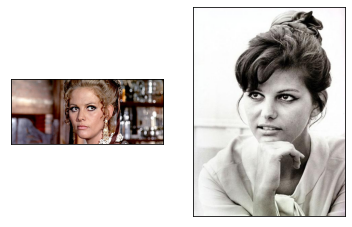

______________________________________________
Cosine similarity:  0.5230936706066132
Euclidean distance:  132.1117
-- They look nothing alike! --


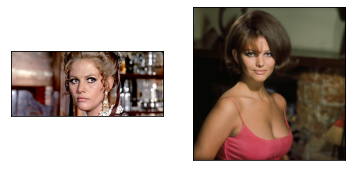

______________________________________________
Cosine similarity:  0.5793555080890656
Euclidean distance:  124.69086
-- They look nothing alike! --


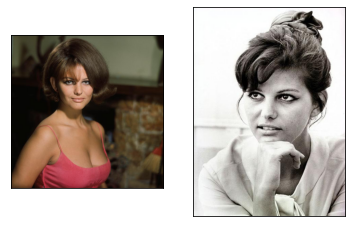

______________________________________________
Cosine similarity:  0.44669950008392334
Euclidean distance:  81.41309
-- They look nothing alike! --


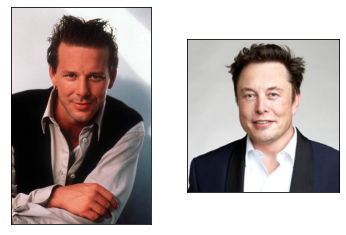

______________________________________________
Cosine similarity:  0.3646628260612488
Euclidean distance:  78.629776
-- They could be brothers/sisters! --


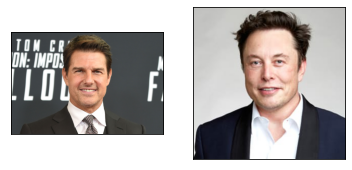

______________________________________________
Cosine similarity:  0.2986738681793213
Euclidean distance:  77.91335
-- They could be brothers/sisters! --


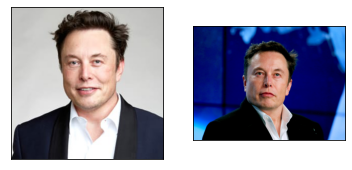

______________________________________________


In [ ]:
verifyFace("cc.jpg", "cc_2.jpg")
verifyFace("cc.jpg", "cc_1.jpg")
verifyFace("cc_1.jpg", "cc_2.jpg")
verifyFace("mr_2.jpg", "em.jpg")
verifyFace("tc_2.jpg", "em.jpg")
verifyFace('em.jpg', 'em_2.jpg')